In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df['Glucose']
y = df['Outcome']
x = np.array(x).reshape(-1,1)
y = np.array(y)

In [5]:
def sigmoid(z):
    z = 1/(1+(np.exp(-(z))))
    return z     
def log_reg(x,y,alp,n):
    b = 0
    w = np.zeros(len(x[0]))
    m , p = x.shape
    for _ in range(n):
        y_hat = np.dot(x,w) + b
        y_pred = sigmoid(y_hat)
        dw = np.dot((x.T),(y_pred-y))/m
        db = np.sum(y_pred-y)/m
        w = w - (alp*dw)
        b = b - (alp*db)
    return w , b

In [13]:
w,b = log_reg(x , y , 0.01 , 100000 )

In [14]:
def pred(x , w , b):
    prediction = sigmoid(np.dot(x,w) + b)
    if prediction > 0.5:
        return print("You are having diabetes",(pred,1))
    else:
        return print("You are not having diabetes",(pred,0))

In [15]:
print(pred(125 , w , b))

You are having diabetes (<function pred at 0x7fe184257f70>, 1)
None


<AxesSubplot:>

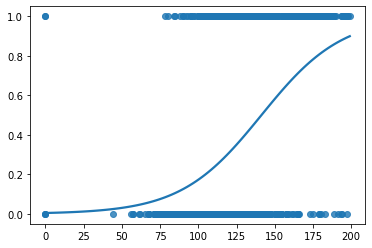

In [21]:
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
